In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df = pd.read_csv('data/hotel_bookings.csv')
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [8]:
df.shape

(119390, 32)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
df.company.unique()

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

In [11]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [12]:
df.reservation_status_date

0         2015-07-01
1         2015-07-01
2         2015-07-02
3         2015-07-02
4         2015-07-03
             ...    
119385    2017-09-06
119386    2017-09-07
119387    2017-09-07
119388    2017-09-07
119389    2017-09-07
Name: reservation_status_date, Length: 119390, dtype: object

In [13]:
#df[['First','Last']] = df.Name.str.split("_",expand=True)         
df.reservation_status_date.str.split("-",expand=True)

,0,1,2
0,2015,07,01
1,2015,07,01
2,2015,07,02
3,2015,07,02
4,2015,07,03
...,...,...,...
119385,2017,09,06
119386,2017,09,07
119387,2017,09,07
119388,2017,09,07


In [14]:
df[['year','month','day']]=df.reservation_status_date.str.split("-",expand=True)

In [15]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,year,month,day
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015,07,01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015,07,01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015,07,02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015,07,02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015,07,03


In [16]:
df.reservation_status.unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [17]:
df[df.reservation_status=='No-Show'][['is_canceled','reservation_status']].sample(80)

,is_canceled,reservation_status
10389,1,No-Show
51320,1,No-Show
40331,1,No-Show
46687,1,No-Show
43093,1,No-Show
...,...,...
3842,1,No-Show
54496,1,No-Show
47670,1,No-Show
53725,1,No-Show


In [18]:
df.distribution_channel.unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [19]:
df.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [20]:
df = df[ ~( (df.children== 0) & (df.adults == 0) ) ] 
# all this guests are check out. but still lets remove them. can not trust the data.

In [21]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,year,month,day
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015,07,01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015,07,01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015,07,02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015,07,02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015,07,03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017,09,06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017,09,07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017,09,07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017,09,07


In [22]:
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel




,month,price_for_resort,price_for_city_hotel
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


<AxesSubplot:xlabel='month', ylabel='price_for_city_hotel'>

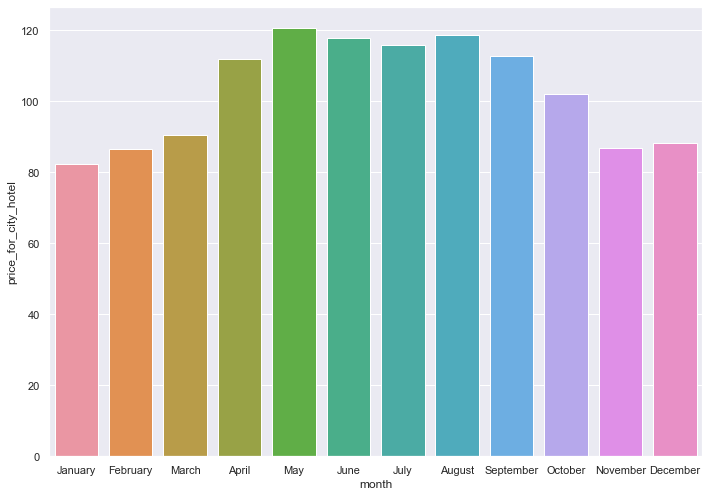

In [23]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.barplot(x = "month",y="price_for_city_hotel", data = final_hotel, order = months)


<AxesSubplot:xlabel='month', ylabel='price_for_resort'>

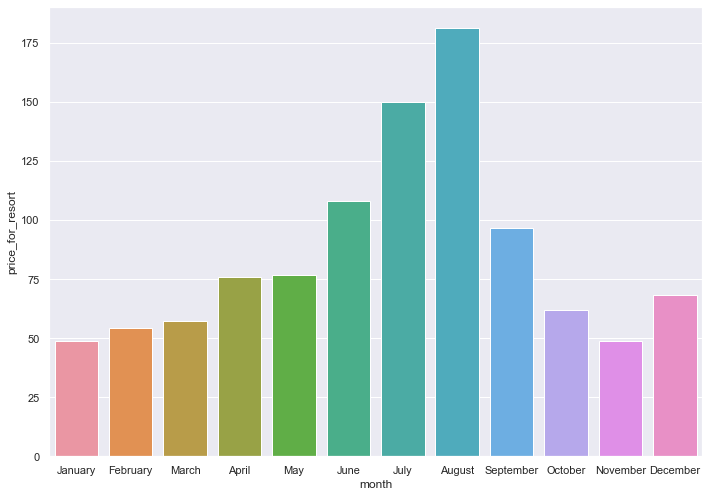

In [24]:
sns.barplot(x = "month",y="price_for_resort", data = final_hotel, order = months)

AttributeError: 'Line2D' object has no property 'order'

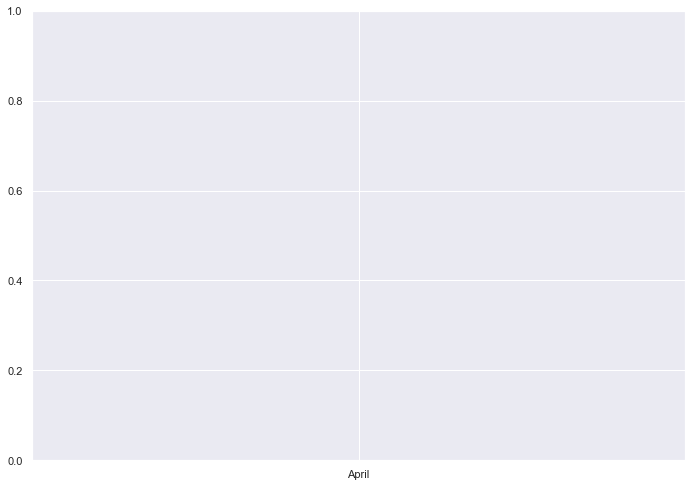

In [25]:
sns.lineplot(data=final_hotel, x="month", y="price_for_resort", order = months)
sns.lineplot(x = "month",y="price_for_city_hotel", data = final_hotel, order = months)

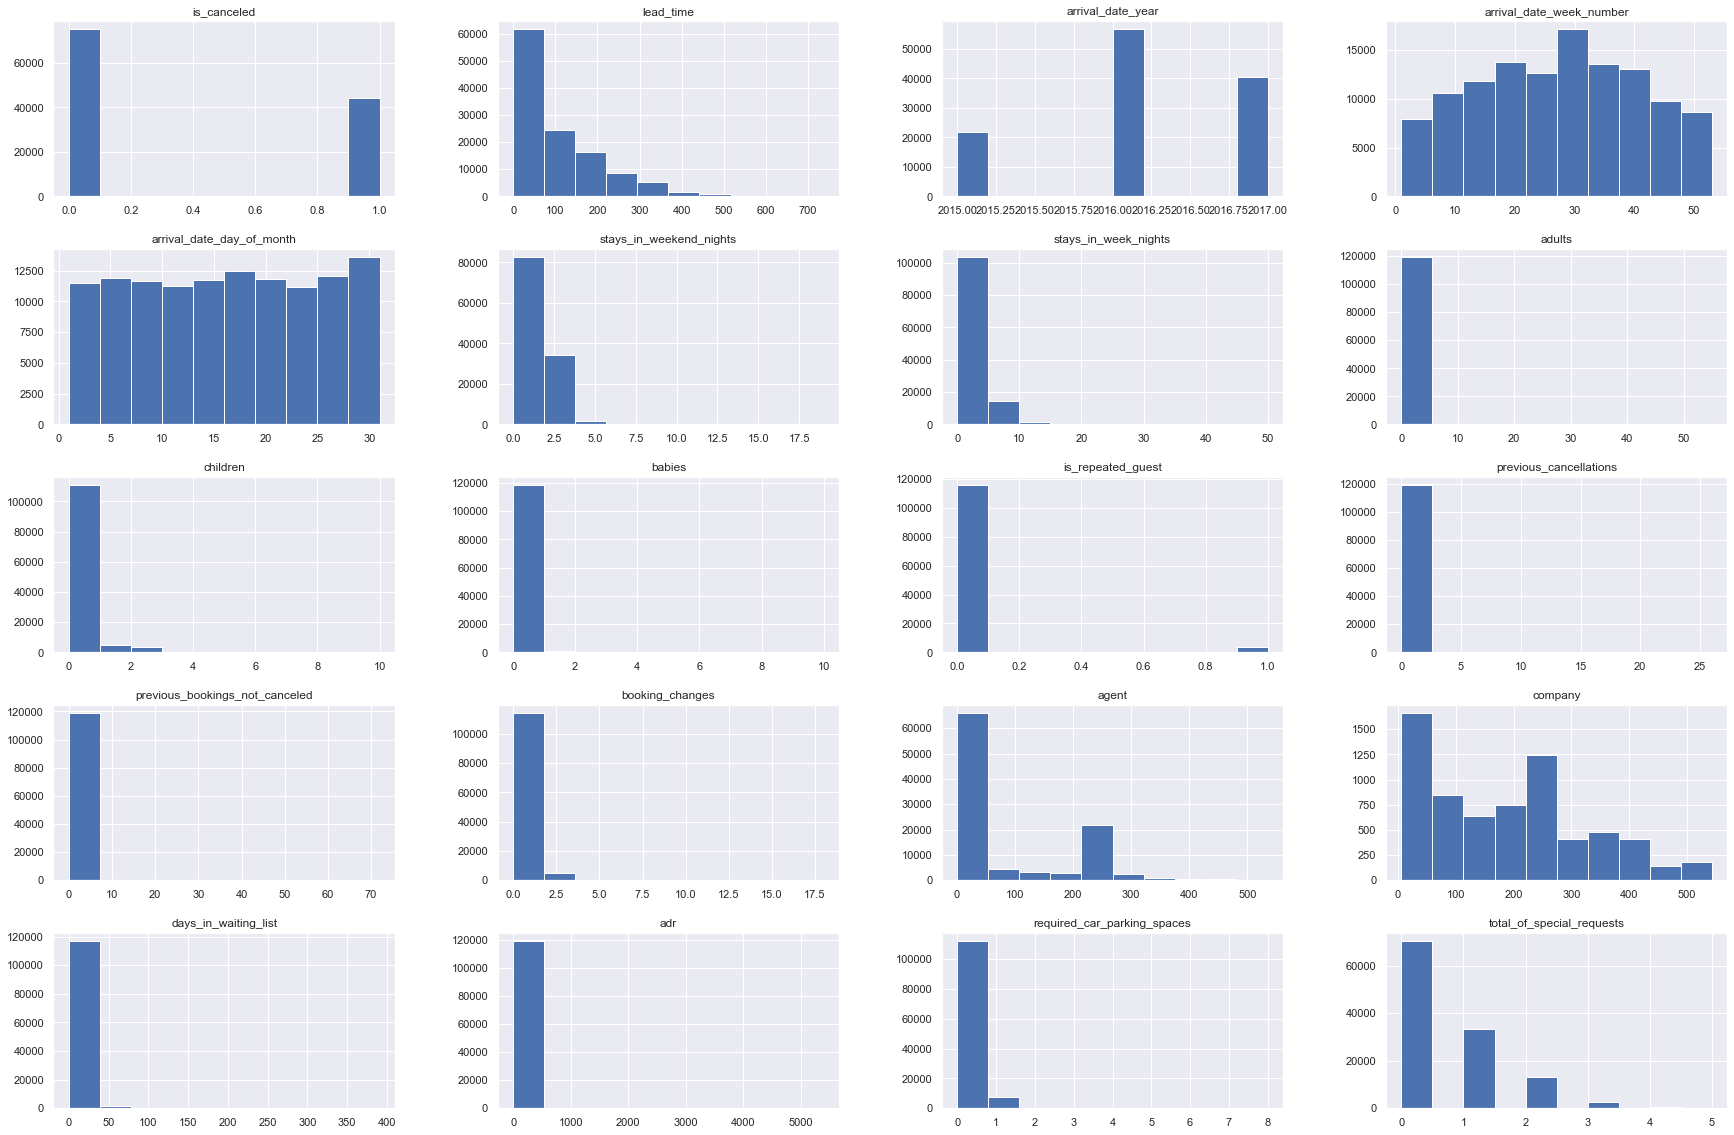

In [26]:
df.hist(figsize=(30,20))
plt.show()

In [27]:
df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.292876,0.016622,0.008315,-0.005948,-0.001323,0.025542,0.058182,0.004862,-0.032569,-0.083745,0.110139,-0.057365,-0.144832,-0.083389,-0.023439,0.054301,0.046492,-0.195701,-0.234877
lead_time,0.292876,1.000000,0.040334,0.127046,0.002306,0.085985,0.166892,0.117575,-0.037886,-0.021003,-0.123209,0.086025,-0.073599,0.002230,-0.070072,0.152539,0.170008,-0.065018,-0.116624,-0.095949
arrival_date_year,0.016622,0.040334,1.000000,-0.540373,-0.000121,0.021694,0.031203,0.030266,0.054698,-0.013192,0.010281,-0.119905,0.029234,0.031416,0.063408,0.258038,-0.056348,0.198429,-0.013812,0.108610
arrival_date_week_number,0.008315,0.127046,-0.540373,1.000000,0.066572,0.018629,0.016047,0.026567,0.005559,0.010417,-0.031125,0.035493,-0.021009,0.006311,-0.031190,-0.076623,0.022677,0.076281,0.001980,0.026202
arrival_date_day_of_month,-0.005948,0.002306,-0.000121,0.066572,1.000000,-0.016225,-0.028362,-0.001754,0.014541,-0.000235,-0.006471,-0.027027,-0.000306,0.011266,0.001396,0.044159,0.022532,0.030291,0.008569,0.003026
stays_in_weekend_nights,-0.001323,0.085985,0.021694,0.018629,-0.016225,1.000000,0.494175,0.094759,0.046134,0.018607,-0.086009,-0.012769,-0.042859,0.050191,0.141407,0.068884,-0.054399,0.050670,-0.018520,0.073124
stays_in_week_nights,0.025542,0.166892,0.031203,0.016047,-0.028362,0.494175,1.000000,0.096214,0.044651,0.020373,-0.095302,-0.013976,-0.048873,0.080018,0.183430,0.191135,-0.002026,0.066847,-0.024933,0.068738
adults,0.058182,0.117575,0.030266,0.026567,-0.001754,0.094759,0.096214,1.000000,0.029416,0.017890,-0.140973,-0.007070,-0.108856,-0.041472,-0.037355,0.215197,-0.008365,0.224253,0.014438,0.123353
children,0.004862,-0.037886,0.054698,0.005559,0.014541,0.046134,0.044651,0.029416,1.000000,0.023999,-0.032477,-0.024755,-0.021079,0.050997,0.040987,0.031144,-0.033294,0.325058,0.056245,0.081756
babies,-0.032569,-0.021003,-0.013192,0.010417,-0.000235,0.018607,0.020373,0.017890,0.023999,1.000000,-0.008813,-0.007509,-0.006552,0.085605,0.036172,0.019326,-0.010627,0.029043,0.037389,0.097939


<AxesSubplot:>

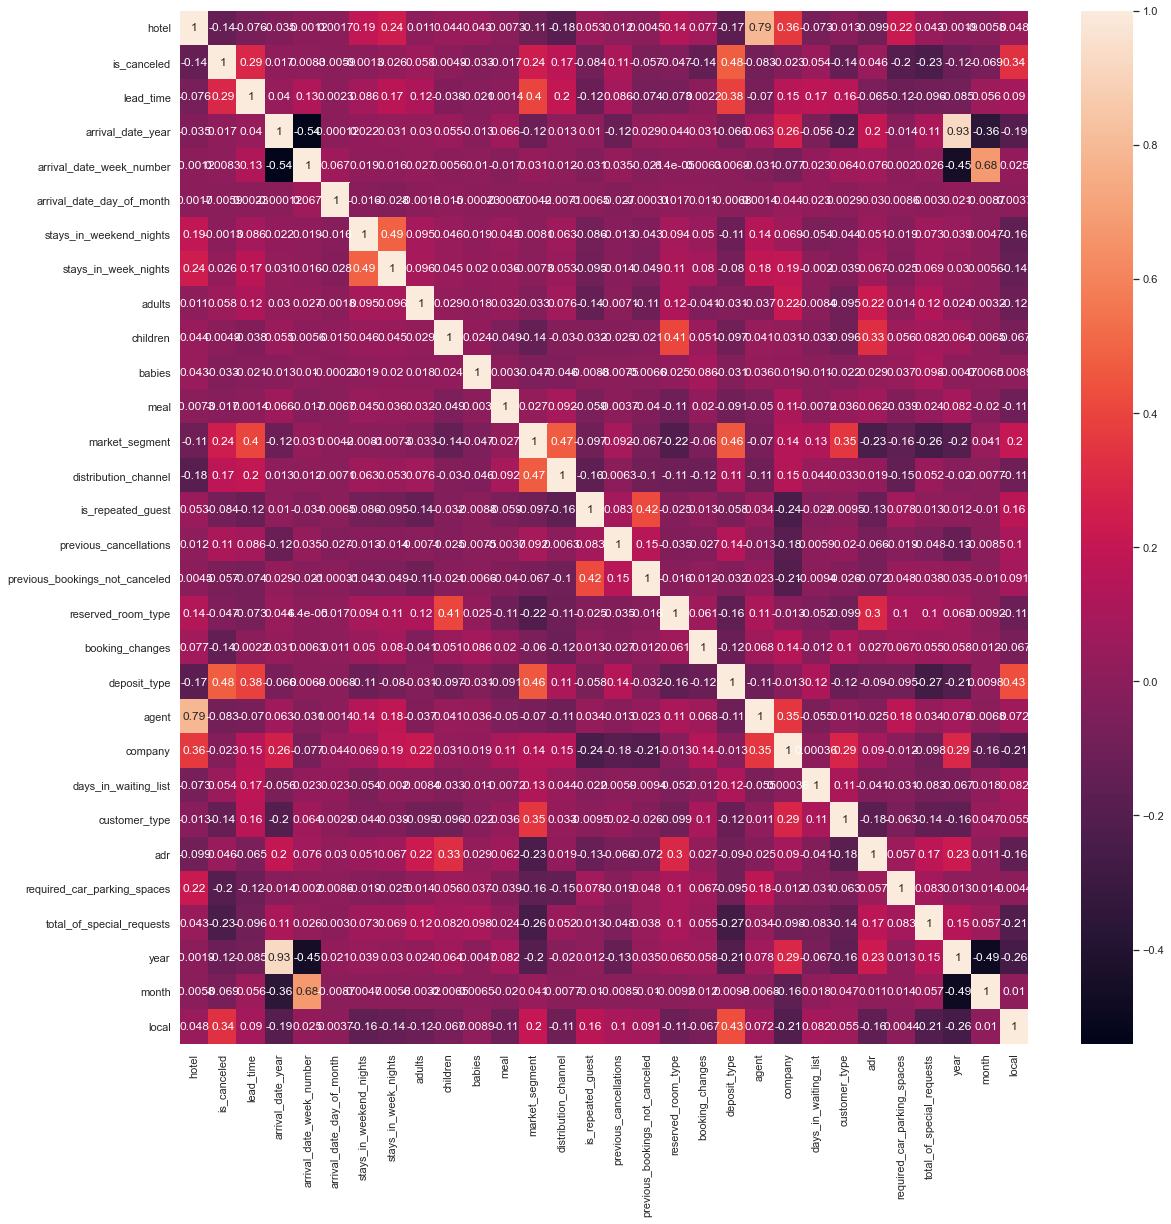

In [55]:
sns.set(rc={'figure.figsize':(19,19)})
sns.heatmap(df.corr(),annot=True)

In [29]:
print('hotel', df.hotel.unique() )
print('market_segment', df.market_segment.unique() ) 
print('meal', df.meal.unique() ) 
print('distribution_channel', df.distribution_channel.unique() )
print('reserved_room_type', df.reserved_room_type.unique() ) 
print('assigned_room_type', df.assigned_room_type.unique() )
print('deposit_type', df.deposit_type.unique() ) 
print('customer_type', df.customer_type.unique() )
print('year', df.year.unique() ) 
print('days_in_waiting_list',df.days_in_waiting_list.unique())

hotel ['Resort Hotel' 'City Hotel']
market_segment ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
meal ['BB' 'FB' 'HB' 'SC' 'Undefined']
distribution_channel ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
reserved_room_type ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']
assigned_room_type ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'L' 'K']
deposit_type ['No Deposit' 'Refundable' 'Non Refund']
customer_type ['Transient' 'Contract' 'Transient-Party' 'Group']
year ['2015' '2014' '2016' '2017']
days_in_waiting_list [  0  50  47  65 122  75 101 150 125  14  60  34 100  22 121  61  39   5
   1   8 107  43  52   2  11 142 116  13  44  97  83   4 113  18  20 185
  93 109   6  37 105 154  64  99  38  48  33  77  21  80  59  40  58  89
  53  49  69  87  91  57 111  79  98  85  63  15   3  41 224  31  56 187
 176  71  55  96 236 259 207 215 160 120  30  32  27  62  24 108 147 379
  70  35 178 330 223 174 162 391  68 193  10  76  16  28   9 165  17  25
  46 

In [30]:
df['hotel'] = df['hotel'].map({ 'City Hotel' : 0,'Resort Hotel' : 1})
df['market_segment'] = df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})
df['meal'] = df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})    
df['distribution_channel'] = df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,'GDS': 4})
df['reserved_room_type'] = df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,'L': 7, 'B': 8})
df['deposit_type'] = df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 2})
df['customer_type'] = df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

In [ ]:
df

In [31]:
df['local'] = np.where(df['country']=='PRT', 1, 0)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,year,month,day,local
0,1,0,342,2015,July,27,1,0,0,2,0.0,0,0,PRT,0,0,0,0,0,0,C,3,0,NaN,NaN,0,0,0.00,0,0,Check-Out,2015-07-01,2015,07,01,1
1,1,0,737,2015,July,27,1,0,0,2,0.0,0,0,PRT,0,0,0,0,0,0,C,4,0,NaN,NaN,0,0,0.00,0,0,Check-Out,2015-07-01,2015,07,01,1
2,1,0,7,2015,July,27,1,0,1,1,0.0,0,0,GBR,0,0,0,0,0,1,C,0,0,NaN,NaN,0,0,75.00,0,0,Check-Out,2015-07-02,2015,07,02,0
3,1,0,13,2015,July,27,1,0,1,1,0.0,0,0,GBR,1,1,0,0,0,1,A,0,0,304.0,NaN,0,0,75.00,0,0,Check-Out,2015-07-02,2015,07,02,0
4,1,0,14,2015,July,27,1,0,2,2,0.0,0,0,GBR,2,2,0,0,0,1,A,0,0,240.0,NaN,0,0,98.00,0,1,Check-Out,2015-07-03,2015,07,03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,August,35,30,2,5,2,0.0,0,0,BEL,3,2,0,0,0,1,A,0,0,394.0,NaN,0,0,96.14,0,0,Check-Out,2017-09-06,2017,09,06,0
119386,0,0,102,2017,August,35,31,2,5,3,0.0,0,0,FRA,2,2,0,0,0,3,E,0,0,9.0,NaN,0,0,225.43,0,2,Check-Out,2017-09-07,2017,09,07,0
119387,0,0,34,2017,August,35,31,2,5,2,0.0,0,0,DEU,2,2,0,0,0,2,D,0,0,9.0,NaN,0,0,157.71,0,4,Check-Out,2017-09-07,2017,09,07,0
119388,0,0,109,2017,August,35,31,2,5,2,0.0,0,0,GBR,2,2,0,0,0,1,A,0,0,89.0,NaN,0,0,104.40,0,0,Check-Out,2017-09-07,2017,09,07,0


In [ ]:
df.booking_changes.unique()

In [32]:
df.days_in_waiting_list.unique()

array([  0,  50,  47,  65, 122,  75, 101, 150, 125,  14,  60,  34, 100,
        22, 121,  61,  39,   5,   1,   8, 107,  43,  52,   2,  11, 142,
       116,  13,  44,  97,  83,   4, 113,  18,  20, 185,  93, 109,   6,
        37, 105, 154,  64,  99,  38,  48,  33,  77,  21,  80,  59,  40,
        58,  89,  53,  49,  69,  87,  91,  57, 111,  79,  98,  85,  63,
        15,   3,  41, 224,  31,  56, 187, 176,  71,  55,  96, 236, 259,
       207, 215, 160, 120,  30,  32,  27,  62,  24, 108, 147, 379,  70,
        35, 178, 330, 223, 174, 162, 391,  68, 193,  10,  76,  16,  28,
         9, 165,  17,  25,  46,   7,  84, 175, 183,  23, 117,  12,  54,
        26,  73,  45,  19,  42,  72,  81,  74, 167,  36], dtype=int64)

In [34]:
ranges = [-1, 7, 30, 90, 180, np.inf]
decodes = [0, 1, 2, 3, 4]

df['days_in_waiting_list_range'] = pd.cut(df['days_in_waiting_list'], ranges, labels=decodes)

In [ ]:
 df.days_in_waiting_list_range.unique()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   hotel                           119210 non-null  int64   
 1   is_canceled                     119210 non-null  int64   
 2   lead_time                       119210 non-null  int64   
 3   arrival_date_year               119210 non-null  int64   
 4   arrival_date_month              119210 non-null  object  
 5   arrival_date_week_number        119210 non-null  int64   
 6   arrival_date_day_of_month       119210 non-null  int64   
 7   stays_in_weekend_nights         119210 non-null  int64   
 8   stays_in_week_nights            119210 non-null  int64   
 9   adults                          119210 non-null  int64   
 10  children                        119206 non-null  float64 
 11  babies                          119210 non-null  int64   
 12  me

In [36]:
df['month'] = df['month'].astype(str).astype(int)
df['year'] = df['year'].astype(str).astype(int)

In [ ]:
df.info()

In [ ]:
df.to_pickle('data/df_kategorik.pkl') 

In [ ]:
df_test = pd.read_pickle('data/df_kategorik.pkl')
df

In [ ]:
df.reservation_status.unique()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

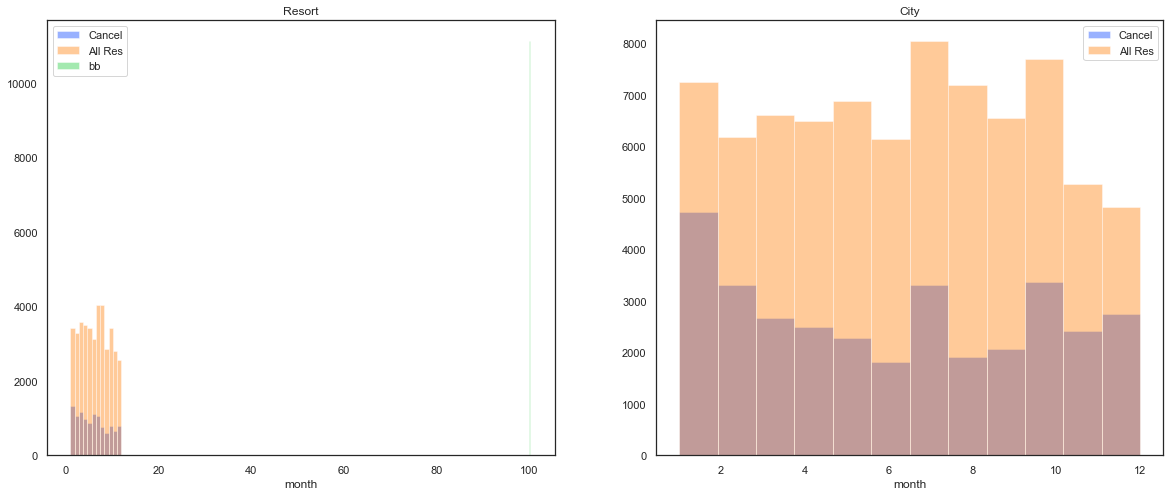

In [39]:
CheckOut = 'All Res'
Canceled = 'Cancel'
sns.set(style="white", palette="bright", color_codes=True)
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 8))
resort = df[df['hotel']== 1]
city = df[df['hotel']== 0]
ax = sns.distplot(resort[resort['is_canceled']==1].month.dropna(), bins=12, label = Canceled, ax = axes[0] , kde =False)
ax = sns.distplot(resort.month.dropna(), bins=12, label = CheckOut, ax = axes[0],  kde =False)
ax = sns.distplot( ((resort[resort['is_canceled']==1].month.dropna()*100)/resort.month.dropna()), bins=12, label = 'bb', ax = axes[0],  kde =False)
ax.legend()
ax.set_title('Resort')
ax = sns.distplot(city[city['is_canceled']==1].month.dropna(), bins=12, label = Canceled, ax = axes[1], kde =False)
ax = sns.distplot(city.month.dropna(), bins=12, label = CheckOut, ax = axes[1], kde =False)
ax.legend()
_ = ax.set_title('City')

In [53]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,year,month,day,local,days_in_waiting_list_range
0,1,0,342,2015,July,27,1,0,0,2,0.0,0,0,PRT,0,0,0,0,0,0,C,3,0,NaN,NaN,0,0,0.00,0,0,Check-Out,2015-07-01,2015,7,01,1,0
1,1,0,737,2015,July,27,1,0,0,2,0.0,0,0,PRT,0,0,0,0,0,0,C,4,0,NaN,NaN,0,0,0.00,0,0,Check-Out,2015-07-01,2015,7,01,1,0
2,1,0,7,2015,July,27,1,0,1,1,0.0,0,0,GBR,0,0,0,0,0,1,C,0,0,NaN,NaN,0,0,75.00,0,0,Check-Out,2015-07-02,2015,7,02,0,0
3,1,0,13,2015,July,27,1,0,1,1,0.0,0,0,GBR,1,1,0,0,0,1,A,0,0,304.0,NaN,0,0,75.00,0,0,Check-Out,2015-07-02,2015,7,02,0,0
4,1,0,14,2015,July,27,1,0,2,2,0.0,0,0,GBR,2,2,0,0,0,1,A,0,0,240.0,NaN,0,0,98.00,0,1,Check-Out,2015-07-03,2015,7,03,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,August,35,30,2,5,2,0.0,0,0,BEL,3,2,0,0,0,1,A,0,0,394.0,NaN,0,0,96.14,0,0,Check-Out,2017-09-06,2017,9,06,0,0
119386,0,0,102,2017,August,35,31,2,5,3,0.0,0,0,FRA,2,2,0,0,0,3,E,0,0,9.0,NaN,0,0,225.43,0,2,Check-Out,2017-09-07,2017,9,07,0,0
119387,0,0,34,2017,August,35,31,2,5,2,0.0,0,0,DEU,2,2,0,0,0,2,D,0,0,9.0,NaN,0,0,157.71,0,4,Check-Out,2017-09-07,2017,9,07,0,0
119388,0,0,109,2017,August,35,31,2,5,2,0.0,0,0,GBR,2,2,0,0,0,1,A,0,0,89.0,NaN,0,0,104.40,0,0,Check-Out,2017-09-07,2017,9,07,0,0


In [54]:
# group data for deposit_type:
deposit_cancel_data = resort.groupby("deposit_type")["reservation_status"].describe()


#show figure:
plt.figure(figsize=(12, 8))
sns.barplot(x=df.index, y=deposit_cancel_data["mean"] * 100)
plt.title("Effect of deposit_type on cancelation", fontsize=16)
plt.xlabel("Deposit type", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.show()

KeyError: 'mean'

<Figure size 864x576 with 0 Axes>